In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("combined_dataset.csv")

In [4]:
df

,Unnamed: 0,text,label,label_hate_speech,tweet,Updated_label
0,24196,"Donald Trump’s Jet, a Regular on the Campaign ...",0,1,Bitches always think somebody want them or the...,3
1,53179,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,1,1,@xcorey21 uh you're trash. &#128536;,1
2,2098,Alex Rodriguez’s Orchestrated Move May Not Be ...,0,2,RT @AP: Lifelong Yankee fan puts aside rooting...,3
3,21253,Who Is Sebastian Gorka? A Trump Adviser Comes ...,0,2,RT @Alleycelestine: &#8220;@ViriDoesItt: Kissi...,3
4,19280,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,@xloyalTOme - bitch I'm up for sale every week...,3
...,...,...,...,...,...,...
59995,3141,CPAC Straw Poll Finds Overwhelming Support for...,0,1,A lot of dumb bitches out here....,3
59996,19322,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,"A hoe gon be a hoe, that ain't a hunnid.",3
59997,37746,NaN,1,1,"Bitch, you may have a million dollar body, but...",1
59998,35670,Obama’s Brother: I’m Voting TrumpPosted on Oct...,1,2,RT @AnnTelnaes: Halloween candy corn bird http...,1


In [5]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('label', inplace=True, axis=1)
df.drop('label_hate_speech', inplace=True, axis=1)

In [6]:
df

,text,tweet,Updated_label
0,"Donald Trump’s Jet, a Regular on the Campaign ...",Bitches always think somebody want them or the...,3
1,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,@xcorey21 uh you're trash. &#128536;,1
2,Alex Rodriguez’s Orchestrated Move May Not Be ...,RT @AP: Lifelong Yankee fan puts aside rooting...,3
3,Who Is Sebastian Gorka? A Trump Adviser Comes ...,RT @Alleycelestine: &#8220;@ViriDoesItt: Kissi...,3
4,Paul Ryan Calls Donald Trump’s Attack on Judge...,@xloyalTOme - bitch I'm up for sale every week...,3
...,...,...,...
59995,CPAC Straw Poll Finds Overwhelming Support for...,A lot of dumb bitches out here....,3
59996,Paul Ryan Calls Donald Trump’s Attack on Judge...,"A hoe gon be a hoe, that ain't a hunnid.",3
59997,NaN,"Bitch, you may have a million dollar body, but...",1
59998,Obama’s Brother: I’m Voting TrumpPosted on Oct...,RT @AnnTelnaes: Halloween candy corn bird http...,1


In [7]:
df.drop('tweet', inplace=True, axis=1)

In [8]:
df

,text,Updated_label
0,"Donald Trump’s Jet, a Regular on the Campaign ...",3
1,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,1
2,Alex Rodriguez’s Orchestrated Move May Not Be ...,3
3,Who Is Sebastian Gorka? A Trump Adviser Comes ...,3
4,Paul Ryan Calls Donald Trump’s Attack on Judge...,3
...,...,...
59995,CPAC Straw Poll Finds Overwhelming Support for...,3
59996,Paul Ryan Calls Donald Trump’s Attack on Judge...,3
59997,NaN,1
59998,Obama’s Brother: I’m Voting TrumpPosted on Oct...,1


In [9]:
df['text']=df['text'].apply(str)

In [10]:
text=df.text

In [11]:
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [12]:
stemmer = PorterStemmer()
sw=set(stopwords.words("english"))

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
for i in range(0, 5):
    print(text[i])

Donald Trump’s Jet, a Regular on the Campaign Trail, Isn’t Registered to Fly - The New York TimesOver the past several months, Donald J. Trump has crisscrossed the country making dozens of campaign stops in places like Sioux City, Iowa, and Jackson, Miss. often in his sleek Cessna jet. There is just one hitch: The plane’s registration is expired. Records kept with the Federal Aviation Administration show the aircraft’s registration lapsed on Jan. 31. Laura J. Brown, a spokeswoman for the Federal Aviation Administration, confirmed that the plane’s registration was not in good standing and said the owner had not renewed it. With few exceptions, aircraft must be registered in order to fly. Mr. Trump’s plane could be grounded for days, or even months, while the issue is sorted out. In the event of an accident, the company that insures the jet could cite the lapsed registration to decline any claims. The F. A. A. could also fine or assess other penalties against the owner, the operator or b

In [15]:
def preprocess(text_string):
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text=re.sub(r'[^\w\s]','',parsed_text)
    return parsed_text

def tokenize(tweet):
    tweet = word_tokenize(tweet)
    return tweet

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
text_pre_processed=[]

In [18]:
for i in range(0, len(text)):
    text_pre_processed.append(preprocess(text[i]))
    text_pre_processed[i]=tokenize(text_pre_processed[i])
    text_pre_processed[i]=[w.lower() for w in text_pre_processed[i]]
    text_pre_processed[i]=[word for word in text_pre_processed[i] if word.isalpha()]
    text_pre_processed[i]=[w for w in text_pre_processed[i] if not w in sw]

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer= TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=sw,
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )

In [21]:
feat=vectorizer.fit_transform(text).toarray()

C:\Users\TP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [22]:
feat.shape

(60000, 10000)

In [23]:
feat.dtype

dtype('float64')

In [24]:
feat

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.65926004, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
X = pd.DataFrame(feat)
y=df['Updated_label'].astype(int)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [28]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
54736,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54913,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38405,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20991,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14137,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,0.0,0.0,0.0,0.0,5.862043,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4521,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43051,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8810,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf=LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\TP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_preds = clf.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
report = classification_report( y_test, y_preds )

In [34]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       159
           1       1.00      1.00      1.00      2856
           2       1.00      0.90      0.95       173
           3       0.99      1.00      1.00      2812

    accuracy                           0.99      6000
   macro avg       1.00      0.95      0.97      6000
weighted avg       0.99      0.99      0.99      6000



In [43]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_test,y_preds)

In [44]:
print(cnf)

[[ 146   13    0    0]
 [   1 2855    0    0]
 [   0    0  155   18]
 [   0    0    0 2812]]


In [45]:
from sklearn import metrics

In [46]:
clf.score(X_test, y_test)

0.9946666666666667

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report
pre=precision_score(y_test, y_preds, average='weighted')
rec=recall_score(y_test, y_preds, average='weighted')
f1_sc=f1_score(y_test, y_preds, average='weighted')

In [48]:
print(pre, rec, f1_sc)

0.9946812080474811 0.9946666666666667 0.9945458293386212


In [50]:
import seaborn

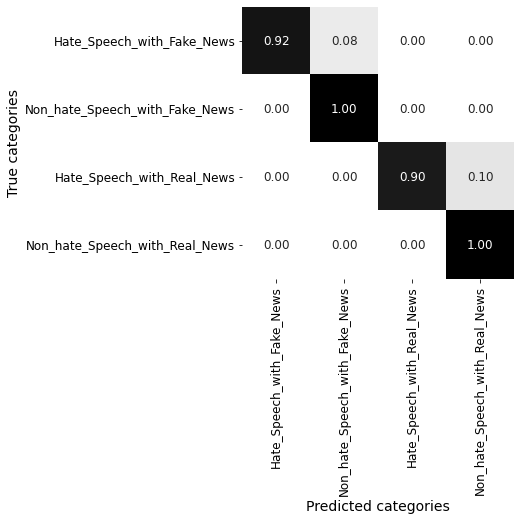

In [51]:
matrix_proportions = np.zeros((4,4))
for i in range(0,4):
    matrix_proportions[i,:] = cnf[i,:]/float(cnf[i,:].sum())
names=['Hate_Speech_with_Fake_News','Non_hate_Speech_with_Fake_News','Hate_Speech_with_Real_News', 'Non_hate_Speech_with_Real_News']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

plt.savefig('Log_reg.pdf')

In [52]:
from sklearn.svm import LinearSVC

In [53]:
clf1=LinearSVC()

In [54]:
clf1.fit(X_train, y_train)

C:\Users\TP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [55]:
y_preds1 = clf1.predict(X_test)

In [56]:
report1= classification_report( y_test, y_preds1)

In [57]:
print(report1)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       159
           1       1.00      1.00      1.00      2856
           2       1.00      0.97      0.98       173
           3       1.00      1.00      1.00      2812

    accuracy                           1.00      6000
   macro avg       1.00      0.98      0.99      6000
weighted avg       1.00      1.00      1.00      6000



In [58]:
cnf1=confusion_matrix(y_test,y_preds1)
print(cnf1)

[[ 152    7    0    0]
 [   0 2856    0    0]
 [   0    0  167    6]
 [   0    0    0 2812]]


In [59]:
clf1.score(X_test, y_test)

0.9978333333333333

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
clf2=RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
clf2.score(X_test, y_test)

0.9495

In [63]:
y_preds2=clf2.predict(X_test)

In [64]:
report2=classification_report(y_test, y_preds2)

In [65]:
print(report2)

              precision    recall  f1-score   support

           0       0.93      0.23      0.37       159
           1       0.96      1.00      0.98      2856
           2       0.27      0.02      0.03       173
           3       0.94      1.00      0.97      2812

    accuracy                           0.95      6000
   macro avg       0.77      0.56      0.59      6000
weighted avg       0.93      0.95      0.93      6000



In [66]:
cnf2=confusion_matrix(y_test, y_preds2)
print(cnf2)

[[  37  122    0    0]
 [   3 2853    0    0]
 [   0    0    3  170]
 [   0    0    8 2804]]


In [67]:
from sklearn.naive_bayes import GaussianNB
clf3=GaussianNB()
clf3.fit(X_train, y_train)

GaussianNB()

In [68]:
clf3.score(X_test, y_test)

0.49

In [69]:
y_preds3=clf3.predict(X_test)

In [70]:
cnf3=confusion_matrix(y_test, y_preds3)
print(cnf3)

[[ 154    5    0    0]
 [1439 1417    0    0]
 [   0    0  153   20]
 [   0    0 1596 1216]]


In [73]:
import xgboost
clf4=xgboost.XGBClassifier()

In [75]:
clf4.fit(X_train, y_train)

C:\Users\TP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [76]:
clf4.score(X_test, y_test)

0.9971666666666666

In [77]:
y_preds4=clf4.predict(X_test)

In [78]:
cnf4=confusion_matrix(y_test, y_preds4)
print(cnf4)

[[ 152    7    0    0]
 [   1 2855    0    0]
 [   0    0  164    9]
 [   0    0    0 2812]]


In [79]:
 names=['Hate_Speech_with_Fake_News','Non_hate_Speech_with_Fake_News','Hate_Speech_with_Real_News', 'Non_hate_Speech_with_Real_News']

[3 3 2 ... 3 3 1]


In [90]:
def plot_confusion_mat(clf_name, cnf_mat):
    matrix_proportions = np.zeros((4,4))
    for i in range(0,4):
        matrix_proportions[i,:] = cnf_mat[i,:]/float(cnf_mat[i,:].sum())
    names=['Hate_Speech_with_Fake_News','Non_hate_Speech_with_Fake_News','Hate_Speech_with_Real_News', 'Non_hate_Speech_with_Real_News']
    confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
    plt.figure(figsize=(5,5))
    seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
    plt.ylabel(r'True categories',fontsize=14)
    plt.xlabel(r'Predicted categories',fontsize=14)
    plt.tick_params(labelsize=12)
    name=clf_name+".pdf"
    plt.savefig(name)

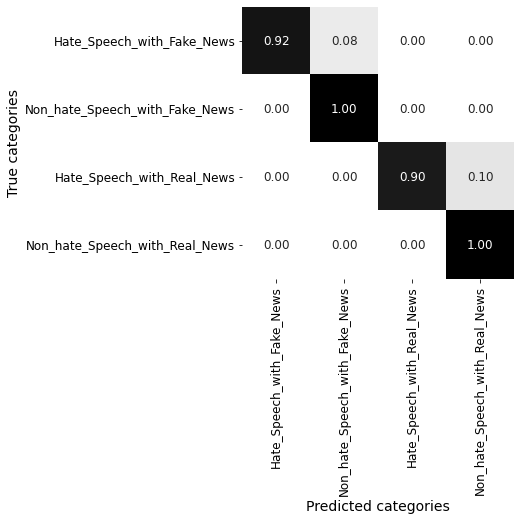

In [92]:
plot_confusion_mat("Logistic_Reg", cnf)

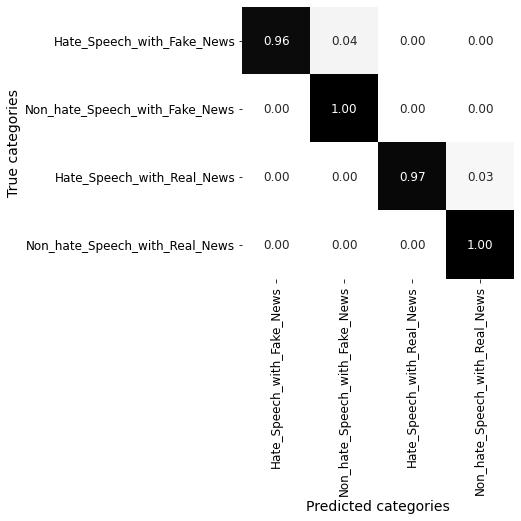

In [93]:
plot_confusion_mat("Linear_SVC", cnf1)

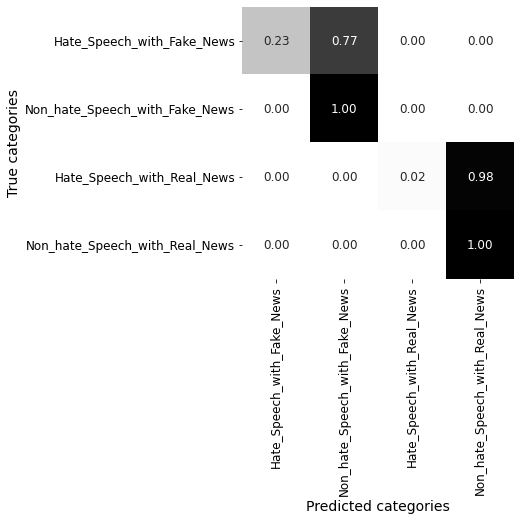

In [94]:
plot_confusion_mat("Random_Forest", cnf2)

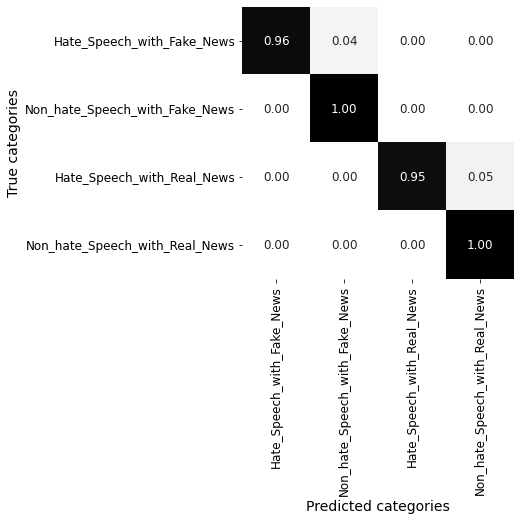

In [95]:
plot_confusion_mat("XGB", cnf4)

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report

In [105]:
def evaluation_metrics(y_test_data, y_predicted): 
    pre=precision_score(y_test_data, y_predicted, average='weighted')
    rec=recall_score(y_test_data, y_predicted, average='weighted')
    f1_sc=f1_score(y_test_data, y_predicted, average='weighted')
    print(pre, rec, f1_sc)

In [106]:
evaluation_metrics(y_test, y_preds)

0.9946812080474811 0.9946666666666667 0.9945458293386212


In [107]:
evaluation_metrics(y_test, y_preds2)

0.93073284562165 0.9495 0.9308390532728266


In [108]:
evaluation_metrics(y_test, y_preds1)

0.9978383149886948 0.9978333333333333 0.9978126269687152


In [109]:
evaluation_metrics(y_test, y_preds4)

0.9971673620980664 0.9971666666666666 0.9971357143213084
